In [1]:
!pip install nltk
import nltk
import pandas as pd
import numpy as np

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Read in files

In [2]:
revs = pd.read_csv("../all_full_reviews.csv").drop(["Unnamed: 0"],axis=1)

# Model 3.2 KNN Regressor - "Words, Business Category, Review Count, Sentiment, review_votes"

In [3]:
revs.categories = revs.categories.str.replace(" ","")
revs.categories
revs["service"] = revs.categories.fillna("").str.split(",")

In [1]:
# binarize the "business types" on yelp

In [4]:
%matplotlib inline
from sklearn.preprocessing import MultiLabelBinarizer

binarizer = MultiLabelBinarizer()
services = pd.DataFrame(
    binarizer.fit_transform(revs["service"]),
    columns=binarizer.classes_
)
services = services.drop([""],axis=1)


In [5]:
x = revs.drop(["categories","words","text", "rating","neu","business_id","review_id","service"],axis=1)

In [6]:
x["rest_rating"] = x["rest_rating"].astype(str)

In [7]:
x_tr = pd.get_dummies(x)
y_tr = revs["rating"]

In [3]:
# normalize

In [8]:
## make dummy for words
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_tr)
x_tr = scaler.transform(x_tr)

In [2]:
# vectorize reviews

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
# for train data - get id-idf sparse matrix 
vec = TfidfVectorizer(norm=None, max_df= .70, max_features=300) # Do not normalize.
revs.words = revs.words.fillna("")
vec.fit(revs.words) # This determines the vocabulary.
tf_idf_sparse_tr = vec.transform(revs.words)
tf_idf_sparse_tr

<10000x300 sparse matrix of type '<class 'numpy.float64'>'
	with 236128 stored elements in Compressed Sparse Row format>

In [10]:
x_tr_s = pd.concat([pd.DataFrame(x_tr),services,pd.DataFrame(tf_idf_sparse_tr.todense())],axis=1)


16

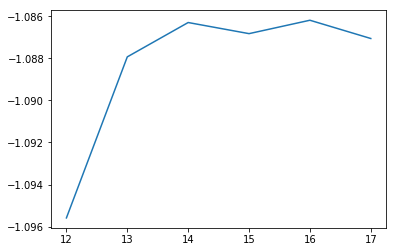

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

ks = pd.Series(range(12, 18, 1))
ks.index = ks
def cv(k):
    model = KNeighborsRegressor(n_neighbors=k)
    return cross_val_score(model, x_tr_s, y_tr, cv=2, scoring="neg_mean_squared_error").mean()

cv_error = ks.apply(cv)
cv_error.plot.line()
cv_error.idxmax()

## Negative Mean Squared Error

In [13]:
cv_error.max()

-1.0861921875